1) Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics , model_selection
from sklearn.naive_bayes import GaussianNB

2) Read the dataset

In [2]:
attributes = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
car_data = pd.read_csv('~/data/car.data', names = attributes)
print(car_data.head())

  buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc


In [3]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null object
maint            1728 non-null object
doors            1728 non-null object
persons          1728 non-null object
lug_boot         1728 non-null object
safety           1728 non-null object
acceptability    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None


3) Factorize the categorical variables

In [4]:
car_data['acceptability'], class_names = pd.factorize(car_data['acceptability'])
print(car_data['acceptability'].unique())

[0 1 2 3]


In [5]:
print(class_names)

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')


Factorizing other categorical variables

In [6]:
car_data['buying'], _ = pd.factorize(car_data['buying'])
car_data['maint'], _ = pd.factorize(car_data['maint'])
car_data['doors'], _ = pd.factorize(car_data['doors'])
car_data['persons'], _ = pd.factorize(car_data['persons'])
car_data['lug_boot'], _ = pd.factorize(car_data['lug_boot'])
car_data['safety'], _ = pd.factorize(car_data['safety'])

Check the data after changes

In [7]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null int64
maint            1728 non-null int64
doors            1728 non-null int64
persons          1728 non-null int64
lug_boot         1728 non-null int64
safety           1728 non-null int64
acceptability    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB
None


4) Choose the predictor and target variables

In [8]:
predictors = car_data.iloc[:,:-1]
target = car_data.iloc[:,-1]
print(predictors.head())
print(target.head())

   buying  maint  doors  persons  lug_boot  safety
0       0      0      0        0         0       0
1       0      0      0        0         0       1
2       0      0      0        0         0       2
3       0      0      0        0         1       0
4       0      0      0        0         1       1
0    0
1    0
2    0
3    0
4    0
Name: acceptability, dtype: int64


5) Split the data into train/test

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(predictors, target, test_size=0.3, random_state=123)

6) Fit the model on the data

In [10]:
naiveBayes = GaussianNB()
## Fit the model on the training data.
naiveBayes.fit(X_train, y_train)

GaussianNB(priors=None)

7) Evaluate the model

In [11]:
y_pred = naiveBayes.predict(X_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 150
Accuracy: 0.71


Plot the Confusion Matrix

[[324  13  28   0]
 [ 40  22  50   4]
 [  0   0  18   0]
 [  4   3   8   5]]
Confusion matrix, without normalization
[[324  13  28   0]
 [ 40  22  50   4]
 [  0   0  18   0]
 [  4   3   8   5]]
Normalized confusion matrix
[[0.89 0.04 0.08 0.  ]
 [0.34 0.19 0.43 0.03]
 [0.   0.   1.   0.  ]
 [0.2  0.15 0.4  0.25]]


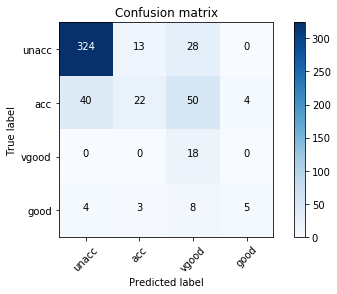

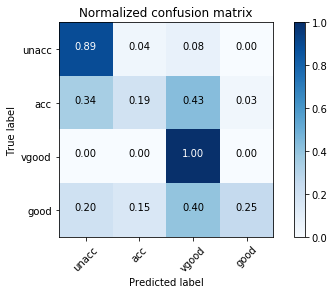

In [15]:
import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(cnf_matrix)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)

[[324  13  28   0]
 [ 40  22  50   4]
 [  0   0  18   0]
 [  4   3   8   5]]
